In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\DELL\Desktop\fer2013.csv")
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [3]:
df

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [4]:
import cv2
import numpy as np
image_size=(48,48)

In [5]:
pixels = df['pixels'].tolist() 
width, height = 48, 48
faces = []

for pixel_sequence in pixels:
  face = [int(pixel) for pixel in pixel_sequence.split(' ')] # Splitting the string by space character as a list
  face = np.asarray(face).reshape(width, height) #converting the list to numpy array in size of 48*48
  face = cv2.resize(face.astype('uint8'),image_size) #resize the image to have 48 cols (width) and 48 rows (height)
  faces.append(face.astype('float32')) #makes the list of each images of 48*48 and their pixels in numpyarray form
  
faces = np.asarray(faces) #converting the list into numpy array
faces = np.expand_dims(faces, -1) #Expand the shape of an array -1=last dimension => means color space
emotions = pd.get_dummies(df['emotion']).to_numpy()

In [6]:
x = faces.astype('float32')
x = x / 255.0 #Dividing the pixels by 255 for normalization  => range(0,1)

# Scaling the pixels value in range(-1,1)
x = x - 0.5
x = x * 2.0

In [8]:
num_samples, num_classes = emotions.shape

num_samples = len(x)
num_train_samples = int((1 - 0.2)*num_samples)

# Traning data
train_x = x[:num_train_samples]
train_y = emotions[:num_train_samples]

# Validation data
valid_x = x[num_train_samples:]
valid_y = emotions[num_train_samples:]

train_data = (train_x, train_y)
valid_data = (valid_x, valid_y)

In [11]:
from keras.layers import Activation, Convolution2D, Dropout, Conv2D
from keras.layers import AveragePooling2D, BatchNormalization
from keras.layers import GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Flatten
from keras.models import Model
from keras.layers import Input
from keras.layers import MaxPooling2D
from keras.layers import SeparableConv2D
from keras import layers
from keras.regularizers import l2

In [12]:
input_shape=(48, 48, 1)
num_classes = 7
model = Sequential()
model.add(Convolution2D(filters=16, kernel_size=(7, 7), padding='same',
                            name='image_array', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Convolution2D(filters=16, kernel_size=(7, 7), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=32, kernel_size=(5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=32, kernel_size=(5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=256, kernel_size=(3, 3), padding='same'))



model.add(BatchNormalization())
model.add(Convolution2D(filters=num_classes, kernel_size=(3, 3), padding='same'))
model.add(GlobalAveragePooling2D())
model.add(Activation('softmax',name='predictions'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_array (Conv2D)         (None, 48, 48, 16)        800       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 16)        64        
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 16)        12560     
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 16)        64        
_________________________________________________________________
activation (Activation)      (None, 48, 48, 16)        0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 24, 24, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 16)        0

In [14]:
# parameters
batch_size = 32 #Number of samples per gradient update
num_epochs = 200 # Number of epochs to train the model.
#input_shape = (64, 64, 1)
verbose = 1 #per epohs  progress bar
num_classes = 7 
patience = 50

In [15]:
from keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(
                        featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        horizontal_flip=True)

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_array (Conv2D)         (None, 48, 48, 16)        800       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 16)        64        
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 16)        12560     
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 16)        64        
_________________________________________________________________
activation (Activation)      (None, 48, 48, 16)        0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 24, 24, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 16)        0

In [27]:
history=model.fit(train_x,train_y,batch_size=32,epochs=30,verbose=1,validation_data=(valid_x, valid_y))

Epoch 1/30
898/898 [==============================] - 575s 640ms/step - loss: 1.4292 - accuracy: 0.4488 - val_loss: 1.3351 - val_accuracy: 0.4884
Epoch 2/30
898/898 [==============================] - 523s 583ms/step - loss: 1.3952 - accuracy: 0.4636 - val_loss: 1.2943 - val_accuracy: 0.5079
Epoch 3/30
898/898 [==============================] - 513s 571ms/step - loss: 1.3697 - accuracy: 0.4730 - val_loss: 1.2668 - val_accuracy: 0.5077
Epoch 4/30
898/898 [==============================] - 509s 567ms/step - loss: 1.3410 - accuracy: 0.4860 - val_loss: 1.2337 - val_accuracy: 0.5270
Epoch 5/30
898/898 [==============================] - 2171s 2s/step - loss: 1.3257 - accuracy: 0.4941 - val_loss: 1.2316 - val_accuracy: 0.5273
Epoch 6/30
898/898 [==============================] - 570s 635ms/step - loss: 1.3109 - accuracy: 0.4977 - val_loss: 1.2410 - val_accuracy: 0.5259
Epoch 7/30
898/898 [==============================] - 537s 598ms/step - loss: 1.2955 - accuracy: 0.5063 - val_loss: 1.2157 - v

In [28]:
score = model.evaluate(valid_x, valid_y, verbose=1) 
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)


225/225 [==============================] - 8s 35ms/step - loss: 1.0975 - accuracy: 0.5823
Test loss: 1.0975373983383179
Test accuracy: 58.23349356651306


In [31]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [58]:
import os
import cv2
import numpy as np
from keras.models import model_from_json
from keras.preprocessing import image

In [59]:
Model = model_from_json(open("model.json", "r").read())
Model.load_weights('model.h5')
face_haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [60]:
import cv2

def _predict(path):
    facecasc = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
    imagePath = '/content/'+path
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=10)
    print("No of faces : ",len(faces))
    i = 1
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]                      #croping
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
        prediction = Model.predict(cropped_img)

    maxindex = int(np.argmax(prediction))
    print("person ",i," : ",emotion_dict[maxindex], "-->",emojis[maxindex])
    cv2.putText(image, emotion_dict[maxindex], (x+10, y-20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)  
    cv2_imshow(image)                                         #if text is not apeared , change coordinates. it may work        

In [63]:
_predict("images\happy.png")

No of faces :  1
person  1  :  Happy --> 😊
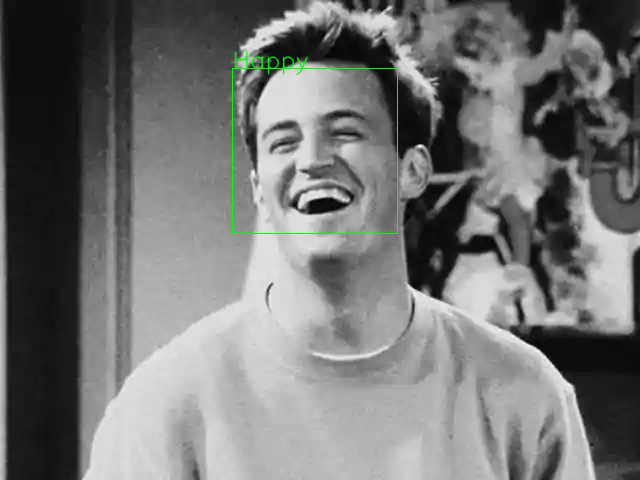

In [64]:
_predict("images\neutral.png")

No of faces :  1
person  1  :  Neutral --> 😐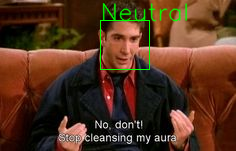

In [65]:
_predict("images\surprise.png")

No of faces :  1
person  1  :  Surprise --> 😲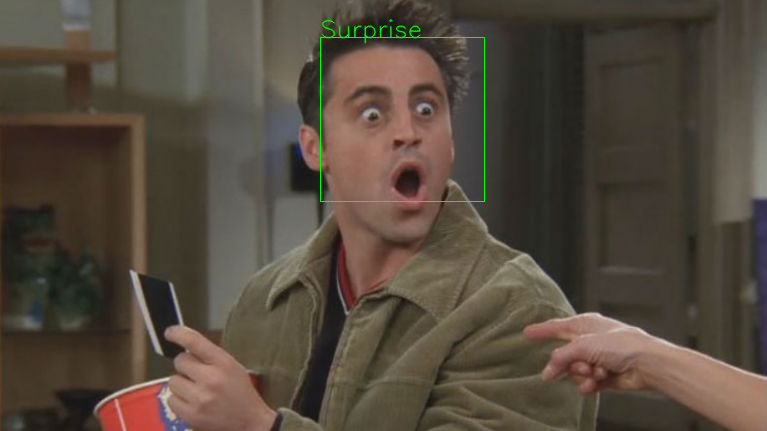